# **Project:** Global Temperature Analysis and Predictions using Neural Networks

### Project Objective: 
Analyze long-term changes in global surface temperatures, examine seasonal variations and year-to-year variability, calculate and visualize temperature anomalies relative to the 1951-1980 means, assess temperature trends in the Northern and Southern Hemispheres, and perform zonal temperature analysis.

### Dataset: 
1. GISS Surface Temperature Analysis Version 4 (GISTEMP v4 dataset) (NASA) (CSV Files))

### 1: Data Preprocessing: 

#### 1.1: Importing Libraries: 

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

#### 1.2: Utilities: 

In [65]:
def plot_series(time, series, format="-", start=0, end=None, labels= None , xlabel="Time", ylabel="Value"):
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format, )

    else:
      # Plot the time series data
        label = labels
        plt.plot(time[start:end], series[start:end], format, label= label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)

#### 1.3: Loading the Dataset:

In [68]:
global_df = pd.read_csv("GLBT.csv", skiprows=1)
nh_df = pd.read_csv("NHT.csv", skiprows=1)
sh_df = pd.read_csv("SHT.csv", skiprows=1)
zonal_df = pd.read_csv("ZonT.csv")
print("**Global Surface Temperature Anomaly Dataset:** \n")
print(global_df.head())
print("\n**Northern Hemisphere Temperature Anomaly Dataset:** \n")
print(nh_df.head())
print("\n**Southern Hemisphere Temperature Anomaly Dataset:** \n")
print(sh_df.head())
print("\n**Zonal Temperature Anomaly Dataset:** \n")
print(zonal_df.head())

**Global Surface Temperature Anomaly Dataset:** 

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.20 -0.26 -0.09 -0.17 -0.10 -0.22 -0.21 -0.11 -0.16 -0.23 -0.23   
1  1881 -0.20 -0.16  0.02  0.03  0.06 -0.19  0.00 -0.05 -0.16 -0.22 -0.19   
2  1882  0.15  0.13  0.04 -0.17 -0.14 -0.23 -0.17 -0.08 -0.15 -0.24 -0.17   
3  1883 -0.30 -0.37 -0.13 -0.19 -0.18 -0.08 -0.08 -0.15 -0.23 -0.12 -0.24   
4  1884 -0.13 -0.09 -0.37 -0.41 -0.34 -0.35 -0.31 -0.28 -0.28 -0.25 -0.34   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0 -0.19 -0.18   ***   *** -0.12 -0.18 -0.21  
1 -0.08 -0.10  -.11  -.18  0.04 -0.08 -0.19  
2 -0.37 -0.12  -.09   .07 -0.09 -0.16 -0.19  
3 -0.12 -0.18  -.20  -.35 -0.17 -0.10 -0.20  
4 -0.31 -0.29  -.27  -.11 -0.37 -0.32 -0.29  

**Northern Hemisphere Temperature Anomaly Dataset:** 

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.39 -0.55 -0.24 -0.32 -0.06 -0.19 -0.24 -0.28 -0.27 -0.32 -0.46   
1

In [70]:
#Printing dataset shapes
print(global_df.shape)
print(nh_df.shape)
print(sh_df.shape)
print(zonal_df.shape)

(145, 19)
(145, 19)
(145, 19)
(145, 15)


In [72]:
# Check for missing values in each dataset
global_df.replace('***', np.nan, inplace=True)
nh_df.replace('***', np.nan, inplace=True)
sh_df.replace('***', np.nan, inplace=True)
zonal_df.replace('***', np.nan, inplace=True)

print(global_df.isnull().sum())
print(nh_df.isnull().sum())
print(sh_df.isnull().sum())
print(zonal_df.isnull().sum())

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     1
DJF     1
MAM     0
JJA     0
SON     0
dtype: int64
Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     1
DJF     1
MAM     0
JJA     0
SON     0
dtype: int64
Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     1
DJF     1
MAM     0
JJA     0
SON     0
dtype: int64
Year       0
Glob       0
NHem       0
SHem       0
24N-90N    0
24S-24N    0
90S-24S    0
64N-90N    0
44N-64N    0
24N-44N    0
EQU-24N    0
24S-EQU    0
44S-24S    0
64S-44S    0
90S-64S    0
dtype: int64


#### 1.3: Handling missing values:

In [75]:
# finding the missing values' indexes
null_indexes = global_df[global_df['D-N'].isnull()].index
print("Land Average Temperature null idexes:", null_indexes)
null_indexes = global_df[global_df['DJF'].isnull()].index
print("Land Average Temperature null idexes:", null_indexes)
null_indexes = sh_df[sh_df['D-N'].isnull()].index
print("Land Average Temperature null idexes:", null_indexes)
null_indexes = sh_df[sh_df['DJF'].isnull()].index
print("Land Average Temperature null idexes:", null_indexes)
null_indexes = nh_df[nh_df['D-N'].isnull()].index
print("Land Average Temperature null idexes:", null_indexes)
null_indexes = nh_df[nh_df['DJF'].isnull()].index
print("Land Average Temperature null idexes:", null_indexes)

Land Average Temperature null idexes: Index([0], dtype='int64')
Land Average Temperature null idexes: Index([0], dtype='int64')
Land Average Temperature null idexes: Index([0], dtype='int64')
Land Average Temperature null idexes: Index([0], dtype='int64')
Land Average Temperature null idexes: Index([0], dtype='int64')
Land Average Temperature null idexes: Index([0], dtype='int64')


In [77]:
#Only first row contains missing values, therefore, dropping the first row
global_df = global_df[(global_df['Year'] > 1880) ]
nh_df = nh_df[(nh_df['Year'] > 1880)  ]
sh_df = sh_df[(sh_df['Year'] > 1880) ]

In [79]:
#checking for missing values again
print(global_df.isnull().sum())
print(nh_df.isnull().sum())
print(sh_df.isnull().sum())
print(zonal_df.isnull().sum())

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     0
DJF     0
MAM     0
JJA     0
SON     0
dtype: int64
Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     0
DJF     0
MAM     0
JJA     0
SON     0
dtype: int64
Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     0
DJF     0
MAM     0
JJA     0
SON     0
dtype: int64
Year       0
Glob       0
NHem       0
SHem       0
24N-90N    0
24S-24N    0
90S-24S    0
64N-90N    0
44N-64N    0
24N-44N    0
EQU-24N    0
24S-EQU    0
44S-24S    0
64S-44S    0
90S-64S    0
dtype: int64


### 1: Exploratory Data Analysis: 

In [82]:
Global_Temp = np.array(global_df['J-D'])
Year = np.array(global_df['Year'])

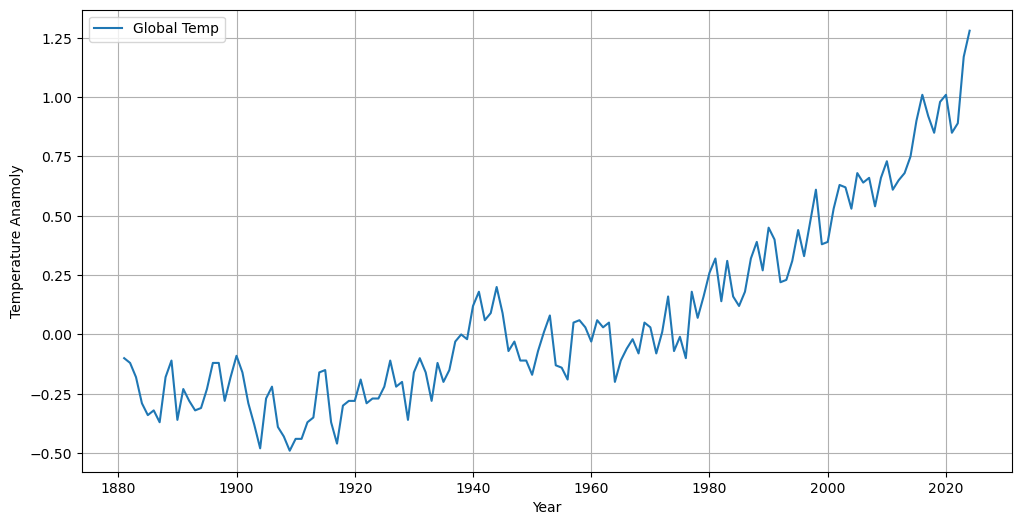

In [84]:
plt.figure(figsize=(12, 6))
plot_series(Year, Global_Temp, labels='Global Temp', xlabel="Year", ylabel="Temperature Anamoly")

In [86]:
NH_Temp = np.array((nh_df['J-D']))
SH_Temp = np.array((sh_df['J-D']))

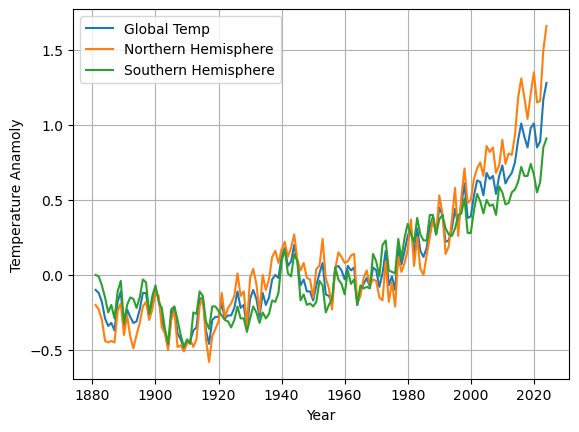

In [88]:
plot_series(Year, Global_Temp, labels='Global Temp')
plot_series(Year, NH_Temp, labels='Northern Hemisphere')
plot_series(Year, SH_Temp, xlabel="Year", ylabel="Temperature Anamoly", labels='Southern Hemisphere')

### Spliting the Dataset


In [91]:
SPLIT_TIME = int(0.8 * len(Global_Temp))

In [93]:
def train_val_split(time, series):
    
    time_train = time[:SPLIT_TIME]
    series_train = series[:SPLIT_TIME]
    time_valid = time[SPLIT_TIME:]
    series_valid = series[SPLIT_TIME:]

    return time_train, series_train, time_valid, series_valid

In [95]:
time_train, series_train, time_valid, series_valid = train_val_split(Year, Global_Temp)

### Naive Forecast


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


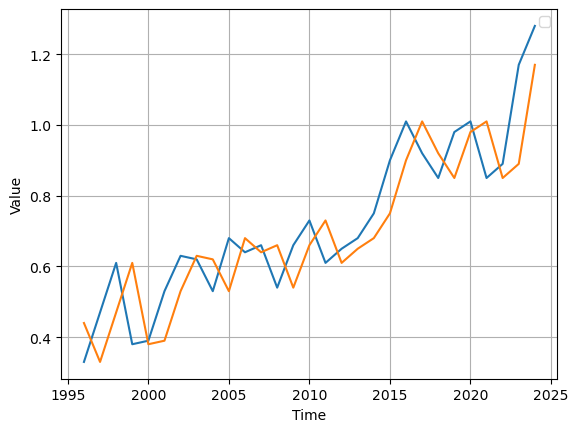

In [98]:
naive_forecast = Global_Temp[SPLIT_TIME - 1:-1]
plot_series(time_valid, (series_valid, naive_forecast), labels=['Actual Series', 'Naive Forecast'])

In [100]:
#Compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period.
print("Naive Forecast MSE:" , tf.keras.metrics.mse(series_valid, naive_forecast).numpy())
print("Naive Forecast MAE:" , tf.keras.metrics.mae(series_valid, naive_forecast).numpy())

Naive Forecast MSE: 0.013972413793103447
Naive Forecast MAE: 0.1006896551724138


### Preparing Features and Labels

In [103]:
WINDOW_SIZE = 25

In [105]:
#Scaling the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(series_train.reshape(-1, 1)).flatten()
test_scaled = scaler.transform(series_valid.reshape(-1, 1)).flatten()

In [107]:
def windowed_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

In [109]:
X_train, y_train = windowed_dataset(train_scaled, WINDOW_SIZE)
X_valid, y_valid = windowed_dataset(test_scaled, WINDOW_SIZE)

### Train the Model

In [112]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['mae'] < 0.075 and logs['val_mae'] < 0.075:
            self.model.stop_training = True
            print("mae and val_mae < 0.075")

#### Dense Neural Network

In [783]:
Dense_model = tf.keras.models.Sequential([ 
        tf.keras.Input(shape= (WINDOW_SIZE,)), # Set the correct input shape for the model
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1)
        
    ])    
Dense_model.compile(loss="mse",
                  optimizer=Adam(),
                  metrics=["mae"])  

history = Dense_model.fit(X_train, y_train,epochs=500, validation_data = (X_valid, y_valid) , callbacks=[EarlyStoppingCallback()])

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - loss: 0.6228 - mae: 0.7180 - val_loss: 2.9659 - val_mae: 1.7070
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2581 - mae: 0.4479 - val_loss: 1.0208 - val_mae: 0.9879
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0905 - mae: 0.2490 - val_loss: 0.2055 - val_mae: 0.4067
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0299 - mae: 0.1419 - val_loss: 0.0449 - val_mae: 0.1979
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0398 - mae: 0.1619 - val_loss: 0.0743 - val_mae: 0.2059
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0439 - mae: 0.1683 - val_loss: 0.0528 - val_mae: 0.1755
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0371 - mae: 0.1585 - val_loss: 0.0343 - val_mae: 0.1814
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0248 - mae: 0.1285 - val_loss: 0.0400 - val_mae: 0.1820
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0206 - mae:

In [784]:
Dense_forecast = []
for i in range(len(series) - WINDOW_SIZE):
    Dense_forecast.append(Dense_model.predict(series[i:i + WINDOW_SIZE][np.newaxis], verbose = 0))
Dense_forecast = Dense_forecast[SPLIT_TIME - WINDOW_SIZE:]
Dense_results = scaler.inverse_transform(np.array(Dense_forecast).reshape(-1, 1)).flatten()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


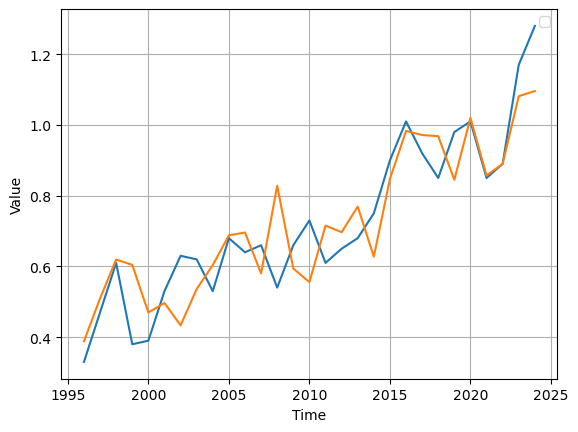

In [785]:
plot_series(time_valid , (series_valid, Dense_results))

In [786]:
print(tf.keras.metrics.mse(series_valid, Dense_results).numpy())
print(tf.keras.metrics.mae(series_valid, Dense_results).numpy())

0.012337138
0.08652232


#### Sequence Model (LSTM)

In [812]:
Seq_model = tf.keras.models.Sequential([ 
        tf.keras.Input(shape= (WINDOW_SIZE,1)), # Set the correct input shape for the model
        tf.keras.layers.Conv1D(filters = 8, kernel_size= 4, strides= 1, padding="causal", activation="relu"),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences= True)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(1)           
        
    ])    
Seq_model.compile(loss="mse",
                  optimizer=Adam(),
                  metrics=["mae"])  

history = Seq_model.fit(X_train, y_train,epochs=100, validation_data = (X_valid, y_valid), callbacks=[EarlyStoppingCallback()])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 45s 677ms/step - loss: 0.2558 - mae: 0.4387 - val_loss: 1.1099 - val_mae: 1.0369
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0528 - mae: 0.1918 - val_loss: 0.0529 - val_mae: 0.1724
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0645 - mae: 0.2206 - val_loss: 0.1738 - val_mae: 0.3767
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0283 - mae: 0.1330 - val_loss: 0.4995 - val_mae: 0.6828
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0327 - mae: 0.1440 - val_loss: 0.5962 - val_mae: 0.7501
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0405 - mae: 0.1628 - val_loss: 0.4287 - val_mae: 0.6289
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0264 - mae: 0.1286 - val_loss: 0.2222 - val_mae: 0.4357
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0251 - mae: 0.1266 - val_loss: 0.1456 - val_mae: 0.3371
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0278

In [814]:
Seq_forecast = []
for i in range(len(series) - WINDOW_SIZE):
    Seq_forecast.append(Seq_model.predict(series[i:i + WINDOW_SIZE][np.newaxis], verbose = 0))
Seq_forecast = Seq_forecast[SPLIT_TIME - WINDOW_SIZE:]
Seq_results = scaler.inverse_transform(np.array(Dense_forecast).reshape(-1, 1)).flatten()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


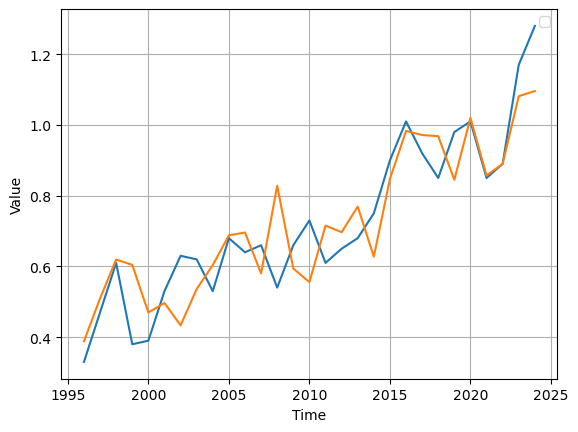

In [834]:
plot_series(time_valid , (series_valid, Seq_results))

In [832]:
print(tf.keras.metrics.mse(series_valid, Seq_results).numpy())
print(tf.keras.metrics.mae(series_valid, Seq_results).numpy())

0.012337138
0.08652232


### Model Prediction

In [676]:
series = np.concatenate((train_scaled.flatten(), test_scaled.flatten()))
pred_year = np.concatenate((Year, np.arange(2025, 2051)))

#### Dense Neural Network

In [799]:
Dense_predictions = series
for i in range(26):
    last_value = len(Dense_predictions) - 1  
    pred_data = Dense_predictions[last_value - 25 + 1 : last_value + 1]
    pred_value = Dense_model.predict(pred_data[np.newaxis])
    Dense_predictions = np.append(Dense_predictions, pred_value)
    i = i + 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [801]:
Dense_pred = scaler.inverse_transform(np.array(Dense_predictions).reshape(-1, 1)).flatten()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


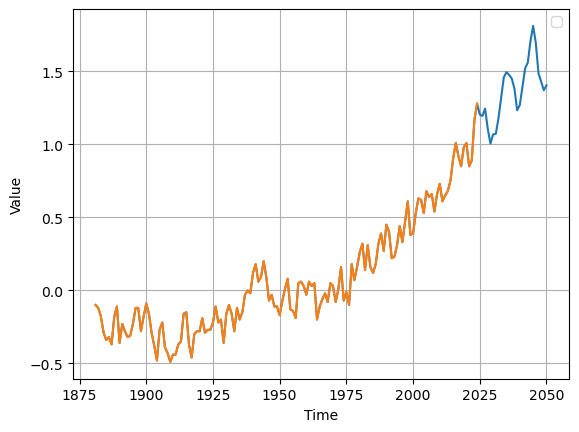

In [838]:
plot_series(pred_year , Dense_pred)
plot_series(Year , Global_Temp)

### Neural Network Observation with Time Series Split
Upon implementing a neural network for global temperature analysis with a time series split, the following results were observed:

**Training Loss (MSE):** The model achieved a training mean squared error (MSE) of approximately 0.015, indicating the average squared difference between predicted and actual values during training.

**Validation Loss (MSE):** The validation MSE was approximately 0.0865, reflecting the model's performance on a separate validation set. A higher validation loss compared to the training loss suggests potential challenges in generalizing to unseen temporal data.

**Prediction:** When applying the trained neural network to a new data point, the model predicted a temperature anomaly of 1.50 till 2050.